In [148]:
# Initialize Otter
import otter
grader = otter.Notebook("projA1.ipynb")

# Project A1: Exploring Cook County Housing

## Due Date: Monday, July 17th 11:59 PM PDT
You must submit this assignment to Gradescope by the on-time deadline, Monday, July 17th at 11:59 PM. Please read the syllabus for the grace period policy. No late
submissions beyond the grace period will be accepted. While course staff is happy to help you if you encounter difficulties with submission, we may not be able to respond to last-minute requests for assistance (TAs need to sleep, after all!). **We strongly encourage you to plan to submit your work to Gradescope several hours before the stated deadline.** This way, you will have ample time to reach out to staff for submission support. 

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** in the collaborators cell below.

**Collaborators:** *list names here*

## Introduction

This project explores what can be learned from an extensive housing dataset that is embedded in a dense social context in Cook County, Illinois.

Here, in project A1, we will guide you through some basic Exploratory Data Analysis (EDA) to understand the structure of the data. Next, you will be adding a few new features to the dataset, while cleaning the data as well in the process.

In project A2, you will specify and fit a linear model for the purpose of prediction. Finally, we will analyze the error of the model and brainstorm ways to improve the model's performance.


## Grading
Grading is broken down into autograded answers and free response. 

For autograded answers, the results of your code are compared to provided and/or hidden tests.

For free response, readers will evaluate how well you answered the question and/or fulfilled the requirements of the question.

Question | Manual | Points
----|----|----
1a | Yes | 1
1b | Yes | 1
1c | Yes | 1
2a | Yes | 1
2b | No | 1
3a | No | 1
3b | No | 1
3c | Yes | 1
4 | No | 2
5b | No | 1
5c | Yes | 2
5d | No | 2
6a | No | 1
6b | No | 2
6c | No | 2
6d | No | 1
7a | No | 1
7b | No | 2
Total | 6 | 24

In [149]:
import numpy as np

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import zipfile
import os

# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# The Data

The dataset consists of over 500,000 records from Cook County, Illinois, the county where Chicago is located. The dataset has 61 features in total; the 62nd is sales price, which you will predict with linear regression in the next part of this project. An explanation of each variable can be found in the included `codebook.txt` file (you can open this by clicking the `codebook.txt` file in the navigation pane). Some of the columns have been filtered out to ensure this assignment doesn't become overly long when dealing with data cleaning and formatting.

The data are split into training and test sets with 204,792 and 68,264 observations, respectively, but we will only be working on the training set for this part of the project.

Let's first extract the data from the `cook_county_data.zip`. Notice we didn't leave the `csv` files directly in the directory because they take up too much space without some prior compression.

In [ ]:
with zipfile.ZipFile('cook_county_data.zip') as item:
    item.extractall()

Let's load the training data.

In [ ]:
training_data = pd.read_csv("cook_county_train.csv", index_col='Unnamed: 0')

As a good sanity check, we should at least verify that the data shape matches the description.

In [5]:
# 204,792 observations and 62 features in training data
assert training_data.shape == (204792, 62)
# Sale Price is provided in the training data
assert 'Sale Price' in training_data.columns.values

The next order of business is getting a feel for the variables in our data.  A more detailed description of each variable is included in `codebook.txt` (in the same directory as this notebook).  **You should take some time to familiarize yourself with the codebook before moving forward.**

Let's take a quick look at all the current columns in our training data.

In [6]:
training_data.columns.values

array(['PIN', 'Property Class', 'Neighborhood Code', 'Land Square Feet',
       'Town Code', 'Apartments', 'Wall Material', 'Roof Material',
       'Basement', 'Basement Finish', 'Central Heating', 'Other Heating',
       'Central Air', 'Fireplaces', 'Attic Type', 'Attic Finish',
       'Design Plan', 'Cathedral Ceiling', 'Construction Quality',
       'Site Desirability', 'Garage 1 Size', 'Garage 1 Material',
       'Garage 1 Attachment', 'Garage 1 Area', 'Garage 2 Size',
       'Garage 2 Material', 'Garage 2 Attachment', 'Garage 2 Area',
       'Porch', 'Other Improvements', 'Building Square Feet',
       'Repair Condition', 'Multi Code', 'Number of Commercial Units',
       'Estimate (Land)', 'Estimate (Building)', 'Deed No.', 'Sale Price',
       'Longitude', 'Latitude', 'Census Tract',
       'Multi Property Indicator', 'Modeling Group', 'Age', 'Use',
       "O'Hare Noise", 'Floodplain', 'Road Proximity', 'Sale Year',
       'Sale Quarter', 'Sale Half-Year', 'Sale Quarter of Year'

In [7]:
training_data['Description'][0]

'This property, sold on 09/14/2015, is a one-story houeshold located at 2950 S LYMAN ST.It has a total of 6 rooms, 3 of which are bedrooms, and 1.0 of which are bathrooms.'

<br/><br/>
<hr style="border: 1px solid #fdb515;" />

# Part 1: Contextualizing the Data

Let's try to understand the background of our dataset before diving into a full-scale analysis. 

**Note**: We will explore this dataset and its social context in greater detail in Lecture 14. For now, we ask you to familiarize yourself with the overall structure of the dataset and the information it contains.

<!-- BEGIN QUESTION -->

<br><br>

---

## Question 1a

Based on the columns in this dataset and the values that they take, what do you think each row represents? That is, what is the granularity of this dataset? 

In [8]:
training_data['Use'][250]

1

Each row of the data set represents one piece of sold property. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

---
## Question 1b

Certain variables in this dataset contain information that either directly contains demographic information (data on people) or could reveal demographic information when linked to other datasets. Identify at least one demographic-related variable and explain the nature of the demographic data it embeds. 

One demographic related variable is the Use column. This column indicates if the property is single family or multi-family, corresponding to 1 and 2 in the data set respectively. This can tell us whether the property is a house or another type of living space such as an apartment or condo where the space is rented usually. Thus, this can help us infer on the type of people living in the properties. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

---
## Question 1c

Craft at least two questions about housing in Cook County that can be answered with this dataset and provide the type of analytical tool you would use to answer it (e.g. "I would create a ___ plot of ___ and ___" or "I would calculate the ___ [summary statistic] for ___ and ____"). Be sure to reference the columns that you would use and any additional datasets you would need to answer that question.

In [9]:
training_data.head()

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,...,Sale Month of Year,Sale Half of Year,Most Recent Sale,Age Decade,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Description,Lot Size
0,17294100610000,203,50,2500.0,76,0.0,2.0,1.0,1.0,3.0,...,9,2,1.0,13.2,0,0.0,50,7650,"This property, sold on 09/14/2015, is a one-st...",2500.0
1,13272240180000,202,120,3780.0,71,0.0,2.0,1.0,1.0,1.0,...,5,1,1.0,9.6,1,1.0,120,71120,"This property, sold on 05/23/2018, is a one-st...",3780.0
2,25221150230000,202,210,4375.0,70,0.0,2.0,1.0,2.0,3.0,...,2,1,0.0,11.2,1,1.0,210,70210,"This property, sold on 02/18/2016, is a one-st...",4375.0
3,10251130030000,203,220,4375.0,17,0.0,3.0,1.0,1.0,3.0,...,7,2,1.0,6.3,1,1.0,220,17220,"This property, sold on 07/23/2013, is a one-st...",4375.0
4,31361040550000,202,120,8400.0,32,0.0,3.0,1.0,2.0,3.0,...,6,1,0.0,6.3,1,1.0,120,32120,"This property, sold on 06/10/2016, is a one-st...",8400.0


I would create a scatter plot of sale price and age to see if the prices of the properties correspond with how new they are. And then I would create a bar plot between the neighboorhood codes and the sale prices to see where the lower class neighboorhoods are vs upper class. 

<!-- END QUESTION -->

<br/><br/>
<hr style="border: 1px solid #fdb515;" />

# Part 2: Exploratory Data Analysis

This dataset was collected by the [Cook County Assessor's Office](https://datacatalog.cookcountyil.gov/Property-Taxation/Archive-Cook-County-Assessor-s-Residential-Sales-D/5pge-nu6u) in order to build a model to predict the monetary value of a home. You can read more about data collection in the CCAO’s [Residential Data Integrity Preliminary Report](https://gitlab.com/ccao-data-science---modeling/ccao_sf_cama_dev/-/blob/master/documentation/Preliminary%20Report%20on%20Data%20Integrity%20June%207,%202019.pdf). In part 2 of this project, you will be building a linear regression model that predicts sales prices using training data but it's important to first understand how the structure of the data informs such a model. In this section, we will make a series of exploratory visualizations and feature engineering in preparation for that prediction task.

Note that we will perform EDA on the **training data**.

### Sale Price
We begin by examining the distribution of our target variable `Sale Price`. At the same time, we also take a look at some descriptive statistics of this variable. We have provided the following helper method `plot_distribution` that you can use to visualize the distribution of the `Sale Price` using both the histogram and the box plot at the same time. Run the following 2 cells and describe what you think is wrong with the visualization.

In [10]:
def plot_distribution(data, label):
    fig, axs = plt.subplots(nrows=2)

    sns.distplot(
        data[label], 
        ax=axs[0]
    )
    sns.boxplot(
        x=data[label],
        width=0.3, 
        ax=axs[1],
        showfliers=False,
    )

    # Align axes
    spacer = np.max(data[label]) * 0.05
    xmin = np.min(data[label]) - spacer
    xmax = np.max(data[label]) + spacer
    axs[0].set_xlim((xmin, xmax))
    axs[1].set_xlim((xmin, xmax))

    # Remove some axis text
    axs[0].xaxis.set_visible(False)
    axs[0].yaxis.set_visible(False)
    axs[1].yaxis.set_visible(False)

    # Put the two plots together
    plt.subplots_adjust(hspace=0)
    fig.suptitle("Distribution of " + label)

In [11]:
training_data ['Sale Price'].describe()

count    2.047920e+05
mean     2.451646e+05
std      3.628694e+05
min      1.000000e+00
25%      4.520000e+04
50%      1.750000e+05
75%      3.120000e+05
max      7.100000e+07
Name: Sale Price, dtype: float64

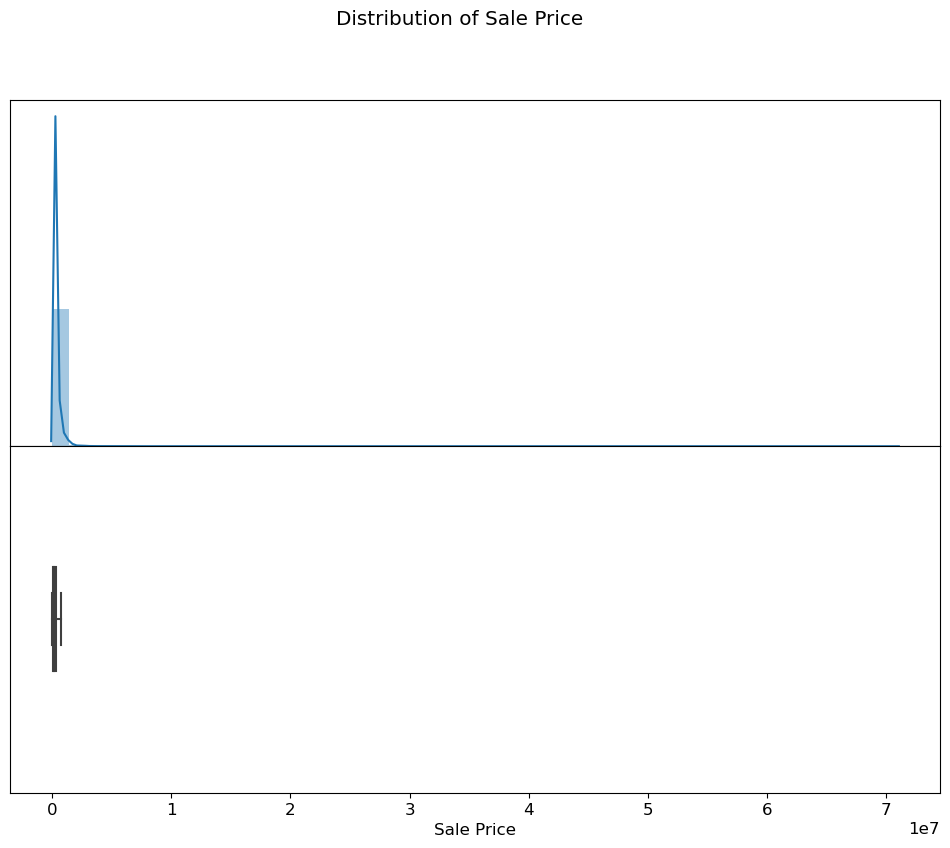

In [12]:
plot_distribution(training_data, label='Sale Price')

<!-- BEGIN QUESTION -->

<br><br>

---
## Question 2a

Identify one issue with the visualization above and briefly describe one way to overcome it. You may also want to try running `training_data['Sale Price'].describe()` in a different cell to see some specific summary statistics on the distribution of the target variable. Make sure to delete the cell afterwards as the autograder may not work otherwise.

Frankly there's alot of issues with this visualization as I'm not really sure what I'm looking at. One main issue is that the all of the data seems to clumped around one value on the x-axis, making it practically unreadable. By running describe on the sale price data it is obvious that there is a lot of variation between the prices of the properties and that is not properly shown here. 

<!-- END QUESTION -->



In [13]:
# optional cell for scratch work

<br><br>

---
## Question 2b

To zoom in on the visualization of most households, we will focus only on a subset of `Sale Price` for this assignment. In addition, it may be a good idea to apply log transformation to `Sale Price`. In the cell below, reassign `training_data` to a new dataframe that is the same as the original one **except with the following changes**:

- `training_data` should contain only households whose price is at least $500.
- `training_data` should contain a new `Log Sale Price` column that contains the log-transformed sale prices.

**Note**: This also implies from now on, our target variable in the model will be the log-transformed sale prices from the column `Log Sale Price`. 

**Note**: You should **NOT** remove the original column `Sale Price` as it will be helpful for later questions.

*To ensure that any error from this part does not propagate to later questions, there will be no hidden test here.*



In [14]:
boop = training_data[['Sale Price']].values >= 500
training_data = training_data[boop]
training_data['Log Sale Price'] = np.log(training_data['Sale Price'])

In [15]:
grader.check("q2b")

q2b results: All test cases passed!

Let's create a new distribution plot on the log-transformed sale price.

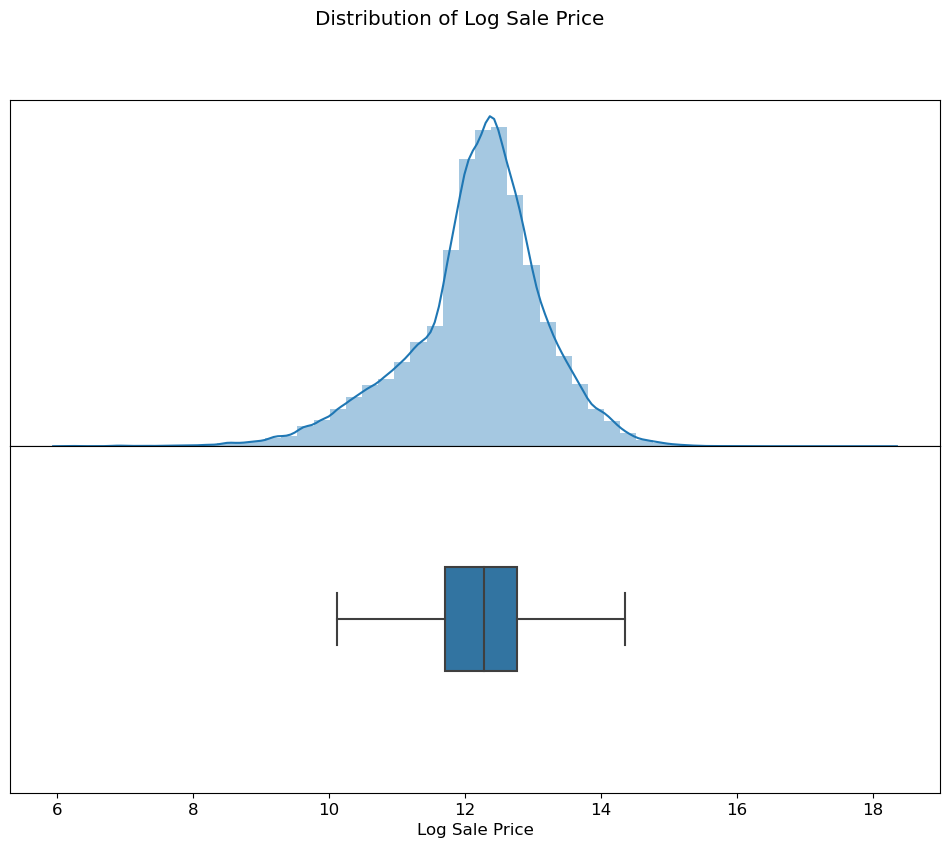

In [16]:
plot_distribution(training_data, label='Log Sale Price');

<br><br>

---
## Question 3a


Is the following statement correct? Assign your answer to `q3statement`.

     "At least 25% of the houses in the training set sold for more than $200,000.00."

**Note:** The provided test for this question does not confirm that you have answered correctly; only that you have assigned each variable to `True` or `False`.


In [17]:
# This should be True or False
q3statement = False

In [18]:
grader.check("q3a")

q3a results: All test cases passed!

<br><br>

---
## Question 3b

Next, we want to explore if there is any correlation between `Log Sale Price` and the total area occupied by the household. The `codebook.txt` file tells us the column `Building Square Feet` should do the trick -- it measures "(from the exterior) the total area, in square feet, occupied by the building".

Let's also apply a log-transformation to the `Building Square Feet` column.

In the following cell, create a new column `Log Building Square Feet` in our `training_data` that contains the log-transformed area occupied by each household. 

**You should NOT remove the original `Building Square Feet` column this time as it will be used for later questions**. 

*To ensure that any errors from this part do not propagate to later questions, there will be no hidden tests here.*


In [19]:
training_data[['Building Square Feet']].head()

,Building Square Feet
1,997.0
2,907.0
3,1174.0
4,949.0
6,1734.0


In [20]:
training_data['Log Building Square Feet'] = np.log(training_data['Building Square Feet'])

In [21]:
grader.check("q3b")

q3b results: All test cases passed!

<!-- BEGIN QUESTION -->

<br><br>

---
## Question 3c

In the visualization below, we created a `jointplot` with `Log Building Square Feet` on the x-axis, and `Log Sale Price` on the y-axis. In addition, we fit a simple linear regression line through the bivariate scatter plot in the middle.

Based on the following plot, would `Log Building Square Feet` make a good candidate as one of the features for our model? Why or why not?

**Hint:** To help answer this question, ask yourself: what kind of relationship does a “good” feature share with the target variable we aim to predict?

![Joint Plot](images/q2p3_jointplot.png)


The data visualized appears to have somewhat of a linear relationship as it is compared to the regression line, so it could potentially be a good candidate feature.

<!-- END QUESTION -->

<br><br>

---
## Question 4

Continuing from the previous part, as you explore the dataset, you might still run into more outliers that prevent you from creating a clear visualization or capturing the trend of the majority of the houses. 

For this assignment, we will work to remove these outliers from the data as we run into them. Write a function `remove_outliers` that removes outliers from the dataset based off a threshold value of a variable. For example, `remove_outliers(training_data, 'Building Square Feet', lower=500, upper=8000)` should return a copy of `data` with only observations that satisfy `Building Square Feet` less than or equal to 8000 (inclusive) and `Building Square Feet` greater than 500 (exclusive).

**Note:** The provided tests simply check that the `remove_outliers` function you defined does not mutate the input data inplace. However, the provided tests do not check that you have implemented `remove_outliers` correctly so that it works with any data, variable, lower, and upper bound.

In [142]:
def remove_outliers(data, variable, lower=-np.inf, upper=np.inf):
    """
    Input:
      data (DataFrame): the table to be filtered
      variable (string): the column with numerical outliers
      lower (numeric): observations with values lower than or equal to this will be removed
      upper (numeric): observations with values higher than this will be removed
    
    Output:
      a DataFrame with outliers removed
      
    Note: This function should not change mutate the contents of data.
    """  
    data_copy = data.copy()
    data_copy = data_copy.loc[lambda df: 
    (df[variable] > lower) & (df[variable] < upper)]
    return data_copy 

In [143]:
grader.check("q4")

q4 results: All test cases passed!

<br/><br/>
<hr style="border: 1px solid #fdb515;" />

# Part 3: Feature Engineering

In this section, we will walk you through a few feature engineering techniques. 

### Bedrooms

Let's start simple by extracting the total number of bedrooms as our first feature for the model. You may notice that the `Bedrooms` column doesn't actually exist in the original dataframe! Instead, it is part of the `Description` column.

<br><br>

---
## Question 5a

Let's take a closer look at the `Description` column first. Compare the description across a few rows together at the same time. For the following list of variables, how many of them can be extracted from the `Description` column? Assign your answer as an integer to the variable `q5a`.
- The date the property was sold on.
- The number of stories the property contains.
- The previous owner of the property.
- The address of the property.
- The number of garages the property has.
- The total number of rooms inside the property.
- The total number of bedrooms inside the property.
- The total number of bathrooms inside the property.

In [24]:
training_data[['Description']].values

array([['This property, sold on 05/23/2018, is a one-story houeshold located at 2844 N LOWELL AVE.It has a total of 6 rooms, 3 of which are bedrooms, and 1.0 of which are bathrooms.'],
       ['This property, sold on 02/18/2016, is a one-story houeshold located at 11415 S PRAIRIE AVE.It has a total of 7 rooms, 3 of which are bedrooms, and 1.0 of which are bathrooms.'],
       ['This property, sold on 07/23/2013, is a one-story with partially livable attics houeshold located at 2012 DOBSON ST.It has a total of 5 rooms, 3 of which are bedrooms, and 1.5 of which are bathrooms.'],
       ...,
       ['This property, sold on 01/31/2014, is a one-story houeshold located at 3525 S 55TH AVE.It has a total of 5 rooms, 3 of which are bedrooms, and 2.0 of which are bathrooms.'],
       ['This property, sold on 02/22/2018, is a one-story houeshold located at 8430 N OSCEOLA AVE.It has a total of 5 rooms, 3 of which are bedrooms, and 1.0 of which are bathrooms.'],
       ['This property, sold on 04/

In [25]:
q5a = 6

In [26]:
grader.check("q5a")

q5a results: All test cases passed!

In [27]:
# optional cell for scratch work

<br><br>

---
## Question 5b

Write a function `add_total_bedrooms(data)` that returns a copy of `data` with an additional column called `Bedrooms` that contains the total number of bedrooms (**as integers**) for each house. Treat missing values as zeros, if necessary. Remember that you can make use of vectorized code here; you shouldn't need any `for` statements. 

**Hint**: You should consider inspecting the `Description` column to figure out if there is any general structure within the text. Once you have noticed a certain pattern, you are set with the power of Regex!


In [28]:
training_data['Description'].values

array(['This property, sold on 05/23/2018, is a one-story houeshold located at 2844 N LOWELL AVE.It has a total of 6 rooms, 3 of which are bedrooms, and 1.0 of which are bathrooms.',
       'This property, sold on 02/18/2016, is a one-story houeshold located at 11415 S PRAIRIE AVE.It has a total of 7 rooms, 3 of which are bedrooms, and 1.0 of which are bathrooms.',
       'This property, sold on 07/23/2013, is a one-story with partially livable attics houeshold located at 2012 DOBSON ST.It has a total of 5 rooms, 3 of which are bedrooms, and 1.5 of which are bathrooms.',
       ...,
       'This property, sold on 01/31/2014, is a one-story houeshold located at 3525 S 55TH AVE.It has a total of 5 rooms, 3 of which are bedrooms, and 2.0 of which are bathrooms.',
       'This property, sold on 02/22/2018, is a one-story houeshold located at 8430 N OSCEOLA AVE.It has a total of 5 rooms, 3 of which are bedrooms, and 1.0 of which are bathrooms.',
       'This property, sold on 04/22/2014, is

In [29]:
def add_total_bedrooms(data):
    """
    Input:
      data (DataFrame): a DataFrame containing at least the Description column.

    Output:
      a Dataframe with a new column "Bedrooms" containing ints.

    """
    with_rooms = data.copy()
    with_rooms['Bedrooms'] = with_rooms['Description'].str.extract(r'([1-9])\srooms', expand = False) 
    with_rooms['Bedrooms'] = with_rooms['Bedrooms'].fillna(0)
    with_rooms['Bedrooms'] = with_rooms['Bedrooms'].astype(int)
    
    #extra sol: with_rooms['Bedrooms'] = pd.to_numeric(with_rooms['Bedrooms'].fillna(0))
    
    return with_rooms

training_data = add_total_bedrooms(training_data)

In [30]:
grader.check("q5b")

q5b results: All test cases passed!

<!-- BEGIN QUESTION -->

<br><br>

---
## Question 5c

Create a visualization that clearly and succintly shows if there exists an association between  `Bedrooms` and `Log Sale Price`. A good visualization should satisfy the following requirements:
- It should avoid overplotting.
- It should have clearly labeled axes and succinct title.
- It should convey the strength of the correlation between the sale price and the number of rooms: in other words, you should be able to look at the plot and describe the general relationship between `Log Sale Price` and `Bedrooms`

**Hint**: A direct scatter plot of the sale price against the number of rooms for all of the households in our training data might risk overplotting.


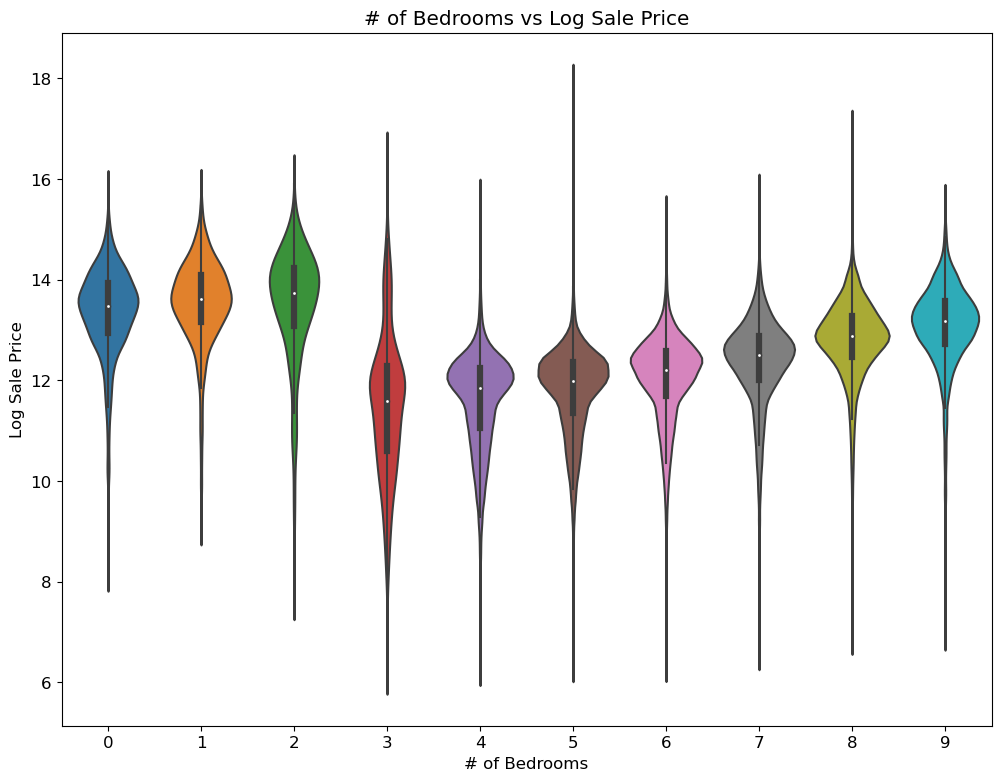

In [31]:
sns.violinplot(data = training_data, x= 'Bedrooms', y= 'Log Sale Price')
plt.title('# of Bedrooms vs Log Sale Price')
plt.xlabel('# of Bedrooms')
plt.ylabel('Log Sale Price');



<!-- END QUESTION -->

Now, let's take a look at the relationship between neighborhood and sale prices of the houses in our dataset.
Notice that currently we don't have the actual names for the neighborhoods. Instead we will use a similar column `Neighborhood Code` (which is a numerical encoding of the actual neighborhoods by the Assessment office).

<br><br>

---
## Question 6a

Before creating any visualization, let's quickly inspect how many different neighborhoods we are dealing with.

Assign the variable `num_neighborhoods` with the total number of unique neighborhoods in `training_data`. 


In [32]:
num_neighborhoods = len(pd.unique(training_data['Neighborhood Code']))
num_neighborhoods

193

In [33]:
grader.check("q6a")

q6a results: All test cases passed!

<br><br>

---
## Question 6b

If we try directly plotting the distribution of `Log Sale Price` for all of the households in each neighborhood using the `plot_categorical` function from the next cell, we would get the following visualization.
![overplot](images/q5p2_catplot.png)

In [34]:
def plot_categorical(neighborhoods):
    fig, axs = plt.subplots(nrows=2)

    sns.boxplot(
        x='Neighborhood Code',
        y='Log Sale Price',
        data=neighborhoods,
        ax=axs[0],
    )

    sns.countplot(
        x='Neighborhood Code',
        data=neighborhoods,
        ax=axs[1],
    )

    # Draw median price
    axs[0].axhline(
        y=training_data['Log Sale Price'].median(), 
        color='red',
        linestyle='dotted'
    )

    # Label the bars with counts
    for patch in axs[1].patches:
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

    # Format x-axes
    axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
    axs[0].xaxis.set_visible(False)

    # Narrow the gap between the plots
    plt.subplots_adjust(hspace=0.01)

Oh no, looks like we have run into the problem of overplotting again! 

You might have noticed that the graph is overplotted because **there are actually quite a few neighborhoods in our dataset**! For the clarity of our visualization, we will have to zoom in again on a few of them. The reason for this is our visualization will become quite cluttered with a super dense x-axis.

Assign the variable `in_top_20_neighborhoods` to a copy of `training_data`  that has been filtered to only contain rows corresponding to properties that are in one of the top 20 most populous neighborhoods. We define the “top 20 neighborhoods” as being the 20 neighborhood codes that have the greatest number of properties within them.


In [145]:
copied = training_data['Neighborhood Code'].value_counts()

copied_df = pd.DataFrame(copied)

copied_20 = copied_df.head(20)

copied_20

most_pop = pd.DataFrame(copied_20.index)
most_pop.values

most_pop_list = list(np.concatenate(most_pop.values))

in_top_20_neighborhoods = training_data.loc \
[lambda x: x['Neighborhood Code'].isin(most_pop_list)]

in_top_20_neighborhoods


#copied_list = copied_20.index.tolist()

#copied_list2 = list(np.concatenate(copied_list))
#in_top_20_neighborhoods = training_data.loc[lambda x: x['Neighborhood Code'].isin(copied_list2)]





,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,...,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Description,Lot Size,Log Sale Price,Log Building Square Feet,Bedrooms,in_expensive_neighborhood
1,13272240180000,202,120,3780.0,71,0.0,Tar&Gravel,Shingle/Asphalt,Shingle/Asphalt,Shingle/Asphalt,...,Shingle/Asphalt,Shingle/Asphalt,120,71120,"This property, sold on 05/23/2018, is a one-st...",3780.0,12.560244,6.904751,Other,0
4,31361040550000,202,120,8400.0,32,0.0,Slate,Shingle/Asphalt,Tar&Gravel,Slate,...,Shingle/Asphalt,Shingle/Asphalt,120,32120,"This property, sold on 06/10/2016, is a one-st...",8400.0,10.025705,6.855409,Tile,0
8,13232040260000,205,70,3100.0,71,0.0,Tar&Gravel,Tar&Gravel,Shingle/Asphalt,Slate,...,Shingle/Asphalt,Shingle/Asphalt,70,7170,"This property, sold on 08/25/2016, is a two-st...",3100.0,13.422468,7.636270,8,0
10,19074270080000,202,380,3750.0,72,0.0,Shingle/Asphalt,Shingle/Asphalt,Tar&Gravel,Slate,...,Shingle/Asphalt,Shingle/Asphalt,380,72380,"This property, sold on 05/01/2017, is a one-st...",3750.0,11.695247,6.841615,Shake,0
11,15083050330000,203,20,5092.0,31,0.0,Tar&Gravel,Shingle/Asphalt,Shingle/Asphalt,Shingle/Asphalt,...,Shingle/Asphalt,Shingle/Asphalt,20,3120,"This property, sold on 04/29/2014, is a one-st...",5092.0,11.184421,6.911747,Tile,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204781,20361190390000,203,80,4405.0,70,0.0,Tar&Gravel,Shingle/Asphalt,Shingle/Asphalt,Slate,...,Shingle/Asphalt,Shingle/Asphalt,80,7080,"This property, sold on 07/15/2013, is a one-st...",4405.0,10.913269,7.141245,Tile,0
204785,9284030280000,202,40,6650.0,22,0.0,Shingle/Asphalt,Shingle/Asphalt,Shingle/Asphalt,Slate,...,Shingle/Asphalt,Shingle/Asphalt,40,2240,"This property, sold on 04/03/2014, is a one-st...",6650.0,11.736069,6.761573,Tile,0
204786,8141120110000,203,100,10010.0,16,0.0,Tar&Gravel,Shingle/Asphalt,Shingle/Asphalt,Shingle/Asphalt,...,Shingle/Asphalt,Shingle/Asphalt,100,16100,"This property, sold on 09/08/2016, is a one-st...",10010.0,12.568978,6.948897,Tile,0
204790,9242030500000,203,80,6650.0,22,0.0,Tar&Gravel,Shingle/Asphalt,Shingle/Asphalt,Slate,...,Shingle/Asphalt,Shingle/Asphalt,80,2280,"This property, sold on 02/22/2018, is a one-st...",6650.0,12.879017,7.092574,Tile,0


In [146]:
grader.check("q6b")

q6b results: All test cases passed!

Let's create another of the distribution of sale price within in each neighborhood again, but this time with a narrower focus!

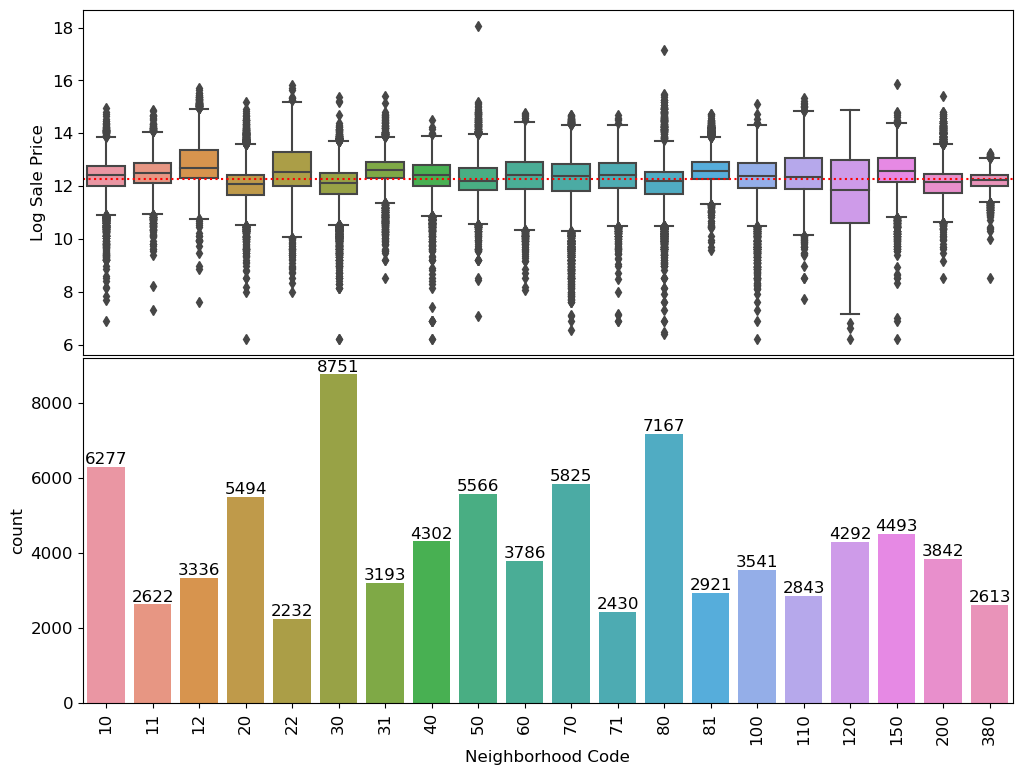

In [147]:
plot_categorical(neighborhoods=in_top_20_neighborhoods)

<br><br>

---
## Question 6c

From the plot above, we can see that there is much less data available for some neighborhoods. For example, Neighborhood 71 has only around 27% of the number of datapoints as Neighborhood 30.

One way we can deal with the lack of data from some neighborhoods is to create a new feature that bins neighborhoods together. We’ll categorize our neighborhoods in a crude way. In Question 6c, we’ll compute how “expensive” each neighborhood is by aggregating the `”Log Sale Price”`s for all properties in a particular neighborhood using a `metric`, such as the median. We’ll use this `metric` to find the top `n` most expensive neighborhoods. Then, in Question 6d, we’ll label these “expensive neighborhoods” and leave all other neighborhoods unmarked.

Fill in `find_expensive_neighborhoods` to return a **list** of the neighborhood codes of the **top `n`** most expensive neighborhoods as measured by our choice of aggregating function, `metric`.

For example, calling `find_expensive_neighborhoods(training_data, n=3, metric=np.median)` should return the 3 neighborhood codes with the highest median `”Log Sale Price”` computed across all properties in those neighborhood codes. 



In [129]:
def find_expensive_neighborhoods(data, n=3, metric=np.median):
    """
    Input:
      data (DataFrame): should contain at least a string-valued 'Neighborhood Code'
        and a numeric 'Log Sale Price' column
      n (int): the number of top values desired
      metric (function): function used for aggregating the data in each neighborhood.
        for example, np.median for median prices
    
    Output:
      a list of the the neighborhood codes of the top n highest-priced neighborhoods 
      as measured by the metric function
    """
    neighborhoods = data.groupby('Neighborhood Code')['Log Sale Price'].agg(metric)
    neighborhoods = neighborhoods.sort_values(ascending = False).head(n).index
 
    
    # This makes sure the final list contains the generic int type used in Python3, not specific ones used in numpy.
    return [int(code) for code in neighborhoods]

expensive_neighborhoods = find_expensive_neighborhoods(training_data, 3, np.median)
expensive_neighborhoods

[44, 94, 93]

In [130]:
grader.check("q6c")

q6c results: All test cases passed!

<br><br>

---
## Question 6e

We now have a list of neighborhoods we've deemed as higher-priced than others.  Let's use that information to write an additional function `add_expensive_neighborhood` that takes in a DataFrame of housing data (`data`) and a list of neighborhood codes considered to be expensive (`expensive_neighborhoods`). You can think of `expensive_neighborhoods` as being the output of the function `find_expensive_neighborhoods` from Question 6c. 

Using these inputs, `add_expensive_neighborhood` should add a column to `data` named `”in_expensive_neighborhood”` that takes on the **integer** value of 1 if a property is part of a neighborhood in `expensive_neighborhoods` and the integer value of 0 if it is not. This type of variable is known as an **indicator variable**.

**Hint:** [`pd.Series.astype`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Series.astype.html) may be useful for converting True/False values to integers.


In [131]:
training_data

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,...,Age Decade,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Description,Lot Size,Log Sale Price,Log Building Square Feet,Bedrooms
1,13272240180000,202,120,3780.0,71,0.0,2.0,1.0,1.0,1.0,...,9.6,1,1.0,120,71120,"This property, sold on 05/23/2018, is a one-st...",3780.0,12.560244,6.904751,6
2,25221150230000,202,210,4375.0,70,0.0,2.0,1.0,2.0,3.0,...,11.2,1,1.0,210,70210,"This property, sold on 02/18/2016, is a one-st...",4375.0,9.998798,6.810142,7
3,10251130030000,203,220,4375.0,17,0.0,3.0,1.0,1.0,3.0,...,6.3,1,1.0,220,17220,"This property, sold on 07/23/2013, is a one-st...",4375.0,12.323856,7.068172,5
4,31361040550000,202,120,8400.0,32,0.0,3.0,1.0,2.0,3.0,...,6.3,1,1.0,120,32120,"This property, sold on 06/10/2016, is a one-st...",8400.0,10.025705,6.855409,5
6,30314240080000,203,181,10890.0,37,0.0,1.0,1.0,1.0,3.0,...,10.9,1,1.0,181,37181,"This property, sold on 10/26/2017, is a one-st...",10890.0,11.512925,7.458186,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204787,25163010260000,202,321,4375.0,72,0.0,2.0,1.0,1.0,1.0,...,5.8,1,1.0,321,72321,"This property, sold on 07/23/2014, is a one-st...",4375.0,10.521372,6.813445,4
204788,5063010090000,204,21,16509.0,23,0.0,1.0,1.0,1.0,1.0,...,9.3,1,1.0,21,2321,"This property, sold on 03/27/2019, is a one-st...",16509.0,12.323856,7.603399,6
204789,16333020150000,202,90,3810.0,15,0.0,2.0,1.0,1.0,1.0,...,5.9,1,1.0,90,1590,"This property, sold on 01/31/2014, is a one-st...",3810.0,11.813030,6.815640,5
204790,9242030500000,203,80,6650.0,22,0.0,2.0,1.0,1.0,3.0,...,6.0,1,1.0,80,2280,"This property, sold on 02/22/2018, is a one-st...",6650.0,12.879017,7.092574,5


In [132]:
def add_in_expensive_neighborhood(data, expensive_neighborhoods):
    """
    Input:
      data (DataFrame): a DataFrame containing a 'Neighborhood Code' column with values
        found in the codebook
      neighborhoods (list of strings): strings should be the names of neighborhoods
        pre-identified as expensive
    Output:
      DataFrame identical to the input with the addition of a binary
      in_expensive_neighborhood column
    """
    data['in_expensive_neighborhood'] = data['Neighborhood Code'].isin(expensive_neighborhoods)
    data['in_expensive_neighborhood'] = data['in_expensive_neighborhood'].astype(int)
    return data

expensive_neighborhoods = find_expensive_neighborhoods(training_data, 3, np.median)
training_data = add_in_expensive_neighborhood(training_data, expensive_neighborhoods)

In [133]:
grader.check("q6d")

q6d results: All test cases passed!

In the following question, we will take a closer look at the `Roof Material` feature of the dataset and examine how we can incorporate categorical features into our linear model.

<br><br>

---
## Question 7a

If we look at `codebook.txt` carefully, we can see that the Assessor's Office uses the following mapping for the numerical values in the `Roof Material` column.
```
Central Heating (Nominal): 

       1	Shingle/Asphalt
       2	Tar&Gravel
       3	Slate
       4	Shake
       5    Tile
       6    Other
```

Write a function `substitute_roof_material` that replaces each numerical value in `Roof Material` with their corresponding roof material. Your function should return a new `DataFrame`, not modify the existing `DataFrame`.

**Hint**: the `DataFrame.replace` ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html)) method may be useful here.



In [134]:
def substitute_roof_material(data):
    """
    Input:
      data (DataFrame): a DataFrame containing a 'Roof Material' column.  Its values
                         should be limited to those found in the codebook
    Output:
      DataFrame identical to the input except with a refactored 'Roof Material' column
    """
    copy = data.copy()
    data = copy.replace([1,2,3,4,5,6], ['Shingle/Asphalt', 'Tar&Gravel', 'Slate', 'Shake', 'Tile', 'Other'])
    return data
    
training_data = substitute_roof_material(training_data)
training_data.head()

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,...,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Description,Lot Size,Log Sale Price,Log Building Square Feet,Bedrooms,in_expensive_neighborhood
1,13272240180000,202,120,3780.0,71,0.0,Tar&Gravel,Shingle/Asphalt,Shingle/Asphalt,Shingle/Asphalt,...,Shingle/Asphalt,Shingle/Asphalt,120,71120,"This property, sold on 05/23/2018, is a one-st...",3780.0,12.560244,6.904751,Other,0
2,25221150230000,202,210,4375.0,70,0.0,Tar&Gravel,Shingle/Asphalt,Tar&Gravel,Slate,...,Shingle/Asphalt,Shingle/Asphalt,210,70210,"This property, sold on 02/18/2016, is a one-st...",4375.0,9.998798,6.810142,7,0
3,10251130030000,203,220,4375.0,17,0.0,Slate,Shingle/Asphalt,Shingle/Asphalt,Slate,...,Shingle/Asphalt,Shingle/Asphalt,220,17220,"This property, sold on 07/23/2013, is a one-st...",4375.0,12.323856,7.068172,Tile,0
4,31361040550000,202,120,8400.0,32,0.0,Slate,Shingle/Asphalt,Tar&Gravel,Slate,...,Shingle/Asphalt,Shingle/Asphalt,120,32120,"This property, sold on 06/10/2016, is a one-st...",8400.0,10.025705,6.855409,Tile,0
6,30314240080000,203,181,10890.0,37,0.0,Shingle/Asphalt,Shingle/Asphalt,Shingle/Asphalt,Slate,...,Shingle/Asphalt,Shingle/Asphalt,181,37181,"This property, sold on 10/26/2017, is a one-st...",10890.0,11.512925,7.458186,Other,0


In [135]:
grader.check("q7a")

q7a results: All test cases passed!

<br><br>

---
## Question 7b

#### An Important Note on One Hot Encoding 

Unfortunately, simply fixing these missing values isn't sufficient for using `Roof Material` in our model.  Since `Roof Material` is a categorical variable, we will have to one-hot-encode the data. For more information on why we want to use one-hot-encoding, refer to this [link](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/).

Complete the following function `ohe_roof_material` that returns a `DataFrame` with the new column one-hot-encoded on the roof material of the household. These new columns should have the form `Roof Material_MATERIAL`. Your function should return a new `DataFrame`, not modify the existing `DataFrame`.

You should use Scikit-learn’s `OneHotEncoder` to perform the one-hot-encoding. `OneHotEncoder` will automatically generate column names of the form `Roof Material_MATERIAL`. Refer back to the video walkthrough for Question 1 of Lab 7 for an example of its use. Note that unlike in the lab example, in this problem we only wish to construct the one-hot-encoding columns **without removing any columns**.

In [136]:
from sklearn.preprocessing import OneHotEncoder

def ohe_roof_material(data):
    """
    One-hot-encodes roof material. New columns are of the form "Roof Material_MATERIAL".
    """
    cat = ['Roof Material']
    
    oh_enc = OneHotEncoder()
    oh_enc.fit(data[cat])

    cat_data = oh_enc.transform(data[cat]).toarray()

    cat_df = pd.DataFrame(data = cat_data, \
                          columns = oh_enc.get_feature_names_out(), index = data.index)

    return data.join(cat_df)
training_data_ohe = ohe_roof_material(training_data)
# This line of code will display only the one-hot-encoded columns in training_data_ohe that 
# have names that begin with “Roof Material_" 
training_data_ohe.filter(regex='^Roof Material_').head(10)

,Roof Material_Other,Roof Material_Shake,Roof Material_Shingle/Asphalt,Roof Material_Slate,Roof Material_Tar&Gravel,Roof Material_Tile
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0
11,0.0,0.0,1.0,0.0,0.0,0.0


In [137]:
grader.check("q7b")

q7b results: All test cases passed!

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Project A1!

What's next? In Project A2, you will focus on building a linear regression model to predict house prices. You will be well-prepared to build such a model: you have considered what is in this dataset, what it can be used for, and engineered some features that should be useful for prediction. However, before we proceed in creating a house-pricing model for Cook County, we will need to consider some challenging social implications that this model may carry. We’ll explore these in greater detail in Lecture 14.


Below, you will see two cells. Running the first cell will automatically generate a PDF of all questions that need to be manually graded, and running the second cell will automatically generate a zip with your autograded answers. **You are responsible for both the coding portion (the zip from Project A.1) and the written portion (the PDF with from Project A.1) to their respective Gradescope portals.** The coding proportion should be submitted to Project A.1 Coding as a single zip file, and the written portion should be submitted to Project A.1 Written as a single pdf file. When submitting the written portion, please ensure you select pages appropriately. 

If there are issues with automatically generating the PDF in the first cell, you can try downloading the notebook as a PDF by clicking on `File -> Save and Export Notebook As... -> PDF`. If that doesn't work either, you can manually take screenshots of your answers to the manually graded questions and submit those. Either way, **you are responsible for ensuring your submission follows our requirements, we will NOT be granting regrade requests for submissions that don't follow instructions.**

In [ ]:
from otter.export import export_notebook
from os import path
from IPython.display import display, HTML
export_notebook("projA1.ipynb", filtering=True, pagebreaks=True)
if(path.exists('projA1.pdf')):
    display(HTML("Download your PDF <a href='projA1.pdf' download>here</a>."))
else:
    print("\n Pdf generation fails, please try the other methods described above")

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)